In [1]:
!pip install pandas

You are using pip version 10.0.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [154]:
import pandas as pd

In [3]:
!pip install chakin

  Using cached https://files.pythonhosted.org/packages/ca/3f/ca2f63451c0ab47970a6ab1d39d96118e70b6e73125529cea767c31368a3/chakin-0.0.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/0a/35/cad87ba36395215e036f311ae4e9205596eddaa528d31e7da632d5ead6e6/progressbar2-3.42.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/eb/a0/19119d8b7c05be49baf6c593f11c432d571b70d805f2fe94c0585e55e4c8/python_utils-2.3.0-py2.py3-none-any.whl
You are using pip version 10.0.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import chakin
chakin.search(lang='English')

                   Name  Dimension                     Corpus VocabularySize  \
2          fastText(en)        300                  Wikipedia           2.5M   
11         GloVe.6B.50d         50  Wikipedia+Gigaword 5 (6B)           400K   
12        GloVe.6B.100d        100  Wikipedia+Gigaword 5 (6B)           400K   
13        GloVe.6B.200d        200  Wikipedia+Gigaword 5 (6B)           400K   
14        GloVe.6B.300d        300  Wikipedia+Gigaword 5 (6B)           400K   
15       GloVe.42B.300d        300          Common Crawl(42B)           1.9M   
16      GloVe.840B.300d        300         Common Crawl(840B)           2.2M   
17    GloVe.Twitter.25d         25               Twitter(27B)           1.2M   
18    GloVe.Twitter.50d         50               Twitter(27B)           1.2M   
19   GloVe.Twitter.100d        100               Twitter(27B)           1.2M   
20   GloVe.Twitter.200d        200               Twitter(27B)           1.2M   
21  word2vec.GoogleNews        300      

In [5]:
chakin.download(number=16, save_dir='embeddings/')

Test:   2% |\                                      | ETA:   0:04:43   7.1 MiB/s

KeyboardInterrupt: 

In [ ]:
chakin.download(number=21, save_dir='embeddings/')

In [155]:
import pandas as pd
import numpy as np
import operator 
import re
import gc
#import keras
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

from gensim.models.keyedvectors import KeyedVectors

model = KeyedVectors.load_word2vec_format('embeddings/GoogleNews-vectors-negative300.bin', binary=True)
model.save_word2vec_format('embeddings/GoogleNews-vectors-negative300.txt', binary=False)

In [158]:
train = pd.read_csv("data/train_F3WbcTw.csv")
test = pd.read_csv("data/test_tOlRoBf.csv")

In [159]:
train["text"] = train['text']+train['drug']
test["text"] = test['text']+test['drug']

In [160]:
df_s = train.groupby('drug')['sentiment'].value_counts() / train.groupby('drug')['sentiment'].count()
df_f = df_s.reset_index(name='cpt')

In [161]:
train_prob = pd.merge(train, df_f,  how='inner', left_on=['drug','sentiment'], right_on = ['drug','sentiment'])


In [162]:
drug_all = train_prob.drug.unique()
sentiment = [0,1,2]

In [163]:
def prob(i,j):
    try:
        return float(train_orig_prob.loc[((train_orig_prob.drug==i) & (train_orig_prob.sentiment==j)),'cpt'][:1])
    except:
        return 0


In [164]:
for i in drug_all:
    for j in [0,1,2]:
        train_prob.loc[((train_prob.sentiment==j) & (train_prob.drug==i)),"Neutral"] = prob(i,2)
        train_prob.loc[((train_prob.sentiment==j) & (train_prob.drug==i)),"Negative"] = prob(i,1)
        train_prob.loc[((train_prob.sentiment==j) & (train_prob.drug==i)),"Positive"] = prob(i,0)
        

In [165]:
def prob_test(drug,sentiment):
        return float(train_prob.loc[train_prob.drug==drug,sentiment][:1])
 

In [166]:
for i in drug_all:
    test.loc[test.drug==i,"Neutral"] = prob_test(i,"Neutral")
    test.loc[test.drug==i,"Positive"] = prob_test(i,"Positive")
    test.loc[test.drug==i,"Negative"] = prob_test(i,"Negative")


In [167]:
train = train_prob

In [168]:
train.head()

,unique_hash,text,drug,sentiment,cpt,Neutral,Negative,Positive
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2,0.53003,0.0,0.0,0.0
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2,0.53003,0.0,0.0,0.0
2,08c3c0c702fc97d290204b37798ac62005da5626,Well as expected my Neurologist wants me to st...,gilenya,2,0.53003,0.0,0.0,0.0
3,497b861718dcea8618daa71fff8ccdeff2e5b161,Multiple sclerosis (MS) can be thought of as a...,gilenya,2,0.53003,0.0,0.0,0.0
4,029b7632b8a7c09b908a57a14c98f74a944fc5ca,You mention 8 recent developments and 25 issue...,gilenya,2,0.53003,0.0,0.0,0.0


In [169]:
df = pd.concat([train ,test])

print("Number of texts: ", df.shape[0])

Number of texts:  8203


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [170]:
def build_vocab(texts):
    sentences = texts.apply(lambda x: x.split()).values
    vocab = {}
    for sentence in sentences:
        for word in sentence:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1
    return vocab

In [171]:
def check_coverage(vocab, embeddings_index):
    known_words = {}
    unknown_words = {}
    nb_known_words = 0
    nb_unknown_words = 0
    for word in vocab.keys():
        try:
            known_words[word] = embeddings_index[word]
            nb_known_words += vocab[word]
        except:
            unknown_words[word] = vocab[word]
            nb_unknown_words += vocab[word]
            pass

    print('Found embeddings for {:.2%} of vocab'.format(len(known_words) / len(vocab)))
    print('Found embeddings for  {:.2%} of all text'.format(nb_known_words / (nb_known_words + nb_unknown_words)))
    unknown_words = sorted(unknown_words.items(), key=operator.itemgetter(1))[::-1]

    return unknown_words

In [172]:
vocab = build_vocab(df['text'])

In [173]:
df['lowered_text'] = df['text'].apply(lambda x: x.lower())

In [174]:
vocab_low = build_vocab(df['lowered_text'])

In [175]:
def add_lower(embedding, vocab):
    count = 0
    for word in vocab:
        if word in embedding and word.lower() not in embedding:  
            embedding[word.lower()] = embedding[word]
            count += 1
    print(f"Added {count} words to embedding")

In [103]:
def known_contractions(embed):
    known = []
    for contract in contraction_mapping:
        if contract in embed:
            known.append(contract)
    return known

In [104]:
def clean_contractions(text, mapping):
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")])
    return text

In [105]:
df['treated_text'] = df['lowered_text'].apply(lambda x: clean_contractions(x, contraction_mapping))

In [107]:
punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'+"≥®🙂≥"

In [108]:
def unknown_punct(embed, punct):
    unknown = ''
    for p in punct:
        if p not in embed:
            unknown += p
            unknown += ' '
    return unknown

In [109]:
punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-", "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 'β': 'beta', '∅': '', '³': '3', 'π': 'pi',}

In [110]:
def clean_special_chars(text, punct, mapping):
    for p in mapping:
        text = text.replace(p, mapping[p])
    
    for p in punct:
        text = text.replace(p, f' {p} ')
    
    specials = {'\u200b': ' ', '…': ' ... ', '\ufeff': '', 'करना': '', 'है': ''}  # Other special characters that I have to deal with in last
    for s in specials:
        text = text.replace(s, specials[s])
    
    return text

In [111]:
df['treated_text'] = df['treated_text'].apply(lambda x: clean_special_chars(x, punct, punct_mapping))

In [112]:
mispell_dict = {'colour': 'color', 'centre': 'center', 'favourite': 'favorite', 'travelling': 'traveling', 'counselling': 'counseling', 'theatre': 'theater', 'cancelled': 'canceled', 'labour': 'labor', 'organisation': 'organization', 'wwii': 'world war 2', 'citicise': 'criticize', 'youtu ': 'youtube ', 'Qoura': 'Quora', 'sallary': 'salary', 'Whta': 'What', 'narcisist': 'narcissist', 'howdo': 'how do', 'whatare': 'what are', 'howcan': 'how can', 'howmuch': 'how much', 'howmany': 'how many', 'whydo': 'why do', 'doI': 'do I', 'theBest': 'the best', 'howdoes': 'how does', 'mastrubation': 'masturbation', 'mastrubate': 'masturbate', "mastrubating": 'masturbating', 'pennis': 'penis', 'Etherium': 'Ethereum', 'narcissit': 'narcissist', 'bigdata': 'big data', '2k17': '2017', '2k18': '2018', 'qouta': 'quota', 'exboyfriend': 'ex boyfriend', 'airhostess': 'air hostess', "whst": 'what', 'watsapp': 'whatsapp', 'demonitisation': 'demonetization', 'demonitization': 'demonetization', 'demonetisation': 'demonetization'}

In [113]:
def correct_spelling(x, dic):
    for word in dic.keys():
        x = x.replace(word, dic[word])
    return x

In [114]:
df['treated_text'] = df['treated_text'].apply(lambda x: correct_spelling(x, mispell_dict))

In [115]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [116]:
df['treated_text'] = df['treated_text'].apply(deEmojify)

In [117]:
len_voc = 95000
max_len = 60

In [118]:
# Lowering
train['treated_text'] = train['text'].apply(lambda x: x.lower())
# Contractions
train['treated_text'] = train['treated_text'].apply(lambda x: clean_contractions(x, contraction_mapping))
# Special characters
train['treated_text'] = train['treated_text'].apply(lambda x: clean_special_chars(x, punct, punct_mapping))
# Spelling mistakes
train['treated_text'] = train['treated_text'].apply(lambda x: correct_spelling(x, mispell_dict))
#removing Emoji's
train['treated_text'] = train['treated_text'].apply(deEmojify)

In [119]:
# Lowering
test['treated_text'] = test['text'].apply(lambda x: x.lower())
# Contractions
test['treated_text'] = test['treated_text'].apply(lambda x: clean_contractions(x, contraction_mapping))
# Special characters
test['treated_text'] = test['treated_text'].apply(lambda x: clean_special_chars(x, punct, punct_mapping))
# Spelling mistakes
test['treated_text'] = test['treated_text'].apply(lambda x: correct_spelling(x, mispell_dict))
#removing Emoji's
test['treated_text'] = test['treated_text'].apply(deEmojify)

In [120]:
# Class count
count_class_0, count_class_1, count_class_2 = train.sentiment.value_counts()

# Divide by class
df_class_0 = train[train['sentiment'] == 0]
df_class_1 = train[train['sentiment'] == 1]
df_class_2 = train[train['sentiment'] == 2]

Random under-sampling:
1    837
2    837
0    617
Name: sentiment, dtype: int64


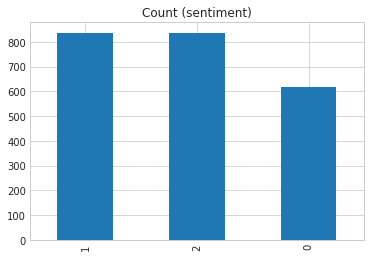

In [121]:
df_class_2_under = df_class_2.sample(count_class_1)
df_test_under = pd.concat([df_class_0, df_class_2_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.sentiment.value_counts())

df_test_under.sentiment.value_counts().plot(kind='bar', title='Count (sentiment)'); 

In [122]:
train = df_test_under

In [123]:
train['sentiment'].value_counts()

1    837
2    837
0    617
Name: sentiment, dtype: int64

In [31]:
y = train['sentiment'].values

In [32]:
X = train.drop('sentiment',axis = 1)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

In [35]:
X_train.head()

,unique_hash,text,drug,treated_text
2128,4d914994f14d2fce0b955b6fcd15be9201295667,Hello I have been on Tagrisso due to a confirm...,tarceva,hello i have been on tagrisso due to a confirm...
2804,e279d0fd36fdcf11da3082f9ba12f86e0cabd222,So I finished my infusion and it went well. Th...,entyvio,so i finished my infusion and it went well . ...
1305,573582802446f203557bf3183a6e2c5038b1341b,So glad your recovery is going well. I am curi...,humira,so glad your recovery is going well . i am cu...
1392,08e3deb07a43136706e5c168b44c2718ab233648,Hi Everyone as usual haven't been on here for ...,fingolimod,hi everyone as usual have not been on here for...
1801,d63e78af97005f6838f9a2cae853d0e213d315d7,"You Write that ""ocrelizumab manages this in a ...",ocrelizumab,"you write that "" ocrelizumab manages this i..."


In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer
def tf(data):
    tfidf = TfidfVectorizer(ngram_range=(1, 2) )
    emb = tfidf.fit_transform(data)
    return emb, tfidf

In [125]:
list_train_to_tfidf = X['treated_text'].tolist()

In [126]:
X_train_tfidf, tfidf = tf(list_train_to_tfidf)

In [127]:
list_test_to_tfidf = test['treated_text'].tolist()

In [128]:
X_test_tfidf = tfidf.transform(list_test_to_tfidf)

In [129]:
y = train['sentiment'].tolist()

In [43]:
from sklearn.model_selection import GridSearchCV

In [130]:
from sklearn.linear_model import LogisticRegression

log_cv = LogisticRegression(C=1.0,multi_class ='auto', penalty= 'l2',solver='newton-cg', tol= 10.0, class_weight='balanced')
log_cv.fit(X_train_tfidf,y)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='auto', n_jobs=None, penalty='l2', random_state=None,
          solver='newton-cg', tol=10.0, verbose=0, warm_start=False)

In [51]:
train['sentiment'].value_counts()

1    837
2    837
0    617
Name: sentiment, dtype: int64

In [135]:
from sklearn.metrics import classification_report

In [131]:
prediction = log_cv.predict(X_test_tfidf)

In [132]:
test['sentiment'] = prediction

In [133]:
test['sentiment'].value_counts()

0    2924
Name: sentiment, dtype: int64

In [138]:
print(classification_report(log_cv.predict(X_train_tfidf),y))

              precision    recall  f1-score   support

           0       1.00      0.27      0.42      2291
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

   micro avg       0.27      0.27      0.27      2291
   macro avg       0.33      0.09      0.14      2291
weighted avg       1.00      0.27      0.42      2291



/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [81]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [82]:
 from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])

In [83]:
text_clf = text_clf.fit(X.treated_text, y)

In [84]:
import numpy as np
predicted = text_clf.predict(X_test.treated_text)
np.mean(predicted == y_test)

0.6296296296296297

In [85]:
 from sklearn.linear_model import SGDClassifier

In [86]:
text_clf_svm = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
alpha=1e-3, n_iter=5, random_state=42)),])

In [87]:
_ = text_clf_svm.fit(X_train.treated_text, y_train)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [88]:
predicted_svm = text_clf_svm.predict(X_test.treated_text)

In [89]:
np.mean(predicted_svm == y_test)

0.5272331154684096

In [90]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],'tfidf__use_idf': (True, False),'clf__alpha': (1e-2, 1e-3),}

In [91]:
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(train.treated_text, train.sentiment)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [92]:
gs_clf.best_score_
gs_clf.best_params_

{'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}

In [93]:
from sklearn.model_selection import GridSearchCV
parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)],'tfidf__use_idf': (True, False),'clf-svm__alpha': (1e-2, 1e-3),}

In [95]:
gs_clf_svm = GridSearchCV(text_clf_svm, parameters_svm, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(X_train.treated_text, y_train)
gs_clf_svm.best_score_
gs_clf_svm.best_params_

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


{'clf-svm__alpha': 0.001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [99]:
knn = KNeighborsClassifier(n_neighbors=5)

In [101]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X.treated_text)
X_train_counts.shape

(2291, 24768)

In [102]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(2291, 24768)

In [104]:
scores = cross_val_score(knn, X_train_tfidf, y, cv=20, scoring='f1_macro')
print(scores)

[0.45199698 0.4730654  0.49946885 0.48278743 0.48066477 0.4455385
 0.47213147 0.45357143 0.50056593 0.47560722 0.42734151 0.49695905
 0.45592663 0.43294952 0.51406926 0.45316276 0.35893093 0.48030782
 0.45310861 0.44812239]


In [105]:
print(scores.mean())

0.46281382404417426


In [106]:
# search for an optimal value of K for KNN

# list of integers 1 to 30
# integers we want to try
k_range = range(1, 31)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train_tfidf, y, cv=20, scoring='f1_macro')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.4399576805757871, 0.42320136561450417, 0.4714770072934174, 0.47725416513898333, 0.46281382404417426, 0.4681431845582071, 0.4616597664847994, 0.45331660562605497, 0.456305824368064, 0.45017576120111225, 0.45118672918651354, 0.45629380833479133, 0.44656905393198143, 0.4392664037959711, 0.42811781168123453, 0.4386707409939115, 0.432031823507117, 0.4350613401736247, 0.43645361992901266, 0.4425574887577521, 0.43723743755043565, 0.4394585142177291, 0.4368770524638979, 0.43943873606646566, 0.43620744066280076, 0.43497156386789737, 0.43771097776479423, 0.43246645938234884, 0.43517384540740245, 0.4286561411833484]


Text(0, 0.5, 'Cross-Validated Accuracy')

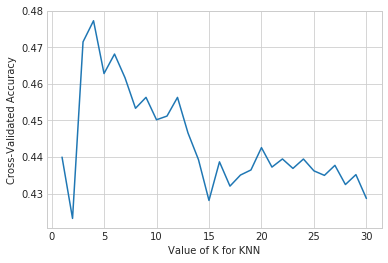

In [107]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [109]:
from sklearn.model_selection import GridSearchCV

In [110]:
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [111]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [113]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='f1_macro')

In [114]:
# fit the grid with data
grid.fit(X_train_tfidf, y)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=0)

In [121]:
# view the complete results (list of named tuples)
grid.cv_results_

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, *

{'mean_fit_time': array([0.00674386, 0.0067343 , 0.00672669, 0.00674701, 0.00672336,
        0.00677197, 0.00674634, 0.0067802 , 0.00675395, 0.00673492,
        0.00679238, 0.00672803, 0.00671504, 0.00674441, 0.00672851,
        0.00679126, 0.00678883, 0.00674396, 0.00674772, 0.00680192,
        0.00716665, 0.0067311 , 0.00685191, 0.00686722, 0.00690672,
        0.00682449, 0.0067945 , 0.00677171, 0.00679376, 0.00681639]),
 'std_fit_time': array([4.83277224e-05, 5.36598659e-05, 4.21280704e-05, 5.56657093e-05,
        4.59686602e-05, 7.54874074e-05, 1.23360169e-04, 1.42055336e-04,
        5.73954737e-05, 4.64856376e-05, 1.54416410e-04, 7.84111696e-05,
        5.90793782e-05, 1.12997351e-04, 3.88773204e-05, 1.58500205e-04,
        1.61102707e-04, 7.52510224e-05, 7.00596149e-05, 1.05723361e-04,
        3.16476043e-04, 7.34304491e-05, 1.34834423e-04, 1.32541724e-04,
        1.41159845e-04, 1.54034382e-04, 8.95175758e-05, 5.81365214e-05,
        7.90304510e-05, 1.15948326e-04]),
 'mean_scor

In [128]:
# define the parameter values that should be searched
k_range = list(range(1, 31))

# Another parameter besides k that we might vary is the weights parameters
# default options --> uniform (all points in the neighborhood are weighted equally)
# another option --> distance (weights closer neighbors more heavily than further neighbors)

# we create a list
weight_options = ['uniform', 'distance']

In [129]:
# create a parameter grid: map the parameter names to the values that should be searched
# dictionary = dict(key=values, key=values)
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [131]:
# instantiate and fit the grid
# exhaustive grid-search because it's trying every combination
# 10-fold cross-validation is being performed 30 x 2 = 60 times

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train_tfidf, y)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [132]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

# Best score did not improve for this model

0.4927979048450458
{'n_neighbors': 6, 'weights': 'distance'}


In [177]:
# train your model using all data and the best known parameters

# instantiate model with best parameters
knn = KNeighborsClassifier(n_neighbors=6, weights='distance')

# fit with X and y, not X_train and y_train
# even if we use train/test split, we should train on X and y before making predictions on new data
# otherwise we throw away potential valuable data we can learn from
knn.fit(X_train_tfidf, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='distance')

In [183]:
#import knn and gridsearch cv from sklearn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#define the model and parameters
knn = KNeighborsClassifier()

parameters = {'n_neighbors':[4,5,6,7],
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree'],
              'weights': ['distance','uniform']}

#Fit the model
model = GridSearchCV(knn, param_grid=parameters)
model.fit(X_train_tfidf,y)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neighbors/base.py:217: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neighbors/base.py:217: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neighbors/base.py:217: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/home/ec2-user/anaconda3/envs/python3/lib/python3

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neighbors/base.py:217: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neighbors/base.py:217: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neighbors/base.py:217: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neighbors/base.py:217: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neighbors/base.py:217: UserWarning: cannot use tree with s

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [4, 5, 6, 7], 'leaf_size': [1, 3, 5], 'algorithm': ['auto', 'kd_tree'], 'weights': ['distance', 'uniform']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [184]:
model.best_params_

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'weights': 'distance'}

In [185]:
model.best_score_

0.4783937145351375

In [164]:
list_train_to_tfidf = X['treated_text'].tolist()

In [165]:
X_train_tfidf, tfidf = tf(list_train_to_tfidf)

In [166]:
# instantiate and fit the grid
# exhaustive grid-search because it's trying every combination
# 10-fold cross-validation is being performed 30 x 2 = 60 times

grid = GridSearchCV(knn, param_grid, cv=10, scoring='f1_macro')
grid.fit(X_train_tfidf, y)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='distance'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=0)

In [167]:
grid.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [170]:
grid.best_score_

0.46481788507437305

In [168]:
list_test_to_tfidf = test['treated_text'].tolist()

In [169]:
X_test_tfidf = tfidf.transform(list_test_to_tfidf)

In [ ]:
{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'weights': 'distance'}

In [186]:
# train your model using all data and the best known parameters

# instantiate model with best parameters
knn = KNeighborsClassifier(n_neighbors=5,algorithm='auto',leaf_size=1,weights='distance')

# fit with X and y, not X_train and y_train
# even if we use train/test split, we should train on X and y before making predictions on new data
# otherwise we throw away potential valuable data we can learn from
knn.fit(X_train_tfidf, y)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [187]:
prediction = knn.predict(X_test_tfidf)

In [188]:
test['sentiment'] = prediction

In [189]:
test['sentiment'].value_counts()

2    1183
1    1166
0     575
Name: sentiment, dtype: int64

In [190]:
submission = test[['unique_hash','sentiment']]

In [191]:
submission.to_csv('output/knn.csv',index = False)

In [193]:
from sklearn.model_selection import GridSearchCV
parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)],'tfidf__use_idf': (True, False),'clf-svm__alpha': (1e-2, 1e-3), }
gs_clf_svm = GridSearchCV(text_clf_svm, parameters_svm, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(X.treated_text, y)
gs_clf_svm.best_score_
gs_clf_svm.best_params_

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


{'clf-svm__alpha': 0.001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}

In [ ]:
text_clf_svm()

In [194]:
prediction = gs_clf_svm.predict(test.treated_text)

In [195]:
test['sentiment'] = prediction

In [196]:
test['sentiment'].value_counts()

2    1536
1    1063
0     325
Name: sentiment, dtype: int64

In [197]:
submission = test[['unique_hash','sentiment']]

In [198]:
submission.to_csv('output/svm.csv',index = False)

In [199]:
#classifiers
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
#preprocessing

In [212]:
#svm with grid search
svm = SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':(1,0.25,0.5,0.75),'gamma': (1,2,3,'auto'),'decision_function_shape':('ovo','ovr'),'shrinking':(True,False)}
clf = GridSearchCV(svm, parameters,scoring = 'f1_macro')
clf.fit(X_train_tfidf,y)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels 

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'rbf'), 'C': (1, 0.25, 0.5, 0.75), 'gamma': (1, 2, 3, 'auto'), 'decision_function_shape': ('ovo', 'ovr'), 'shrinking': (True, False)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=0)

In [201]:
4+4

8

In [ ]:
print("accuracy:"+str(np.average(cross_val_score(clf, X_train_tfidf, y, scoring='accuracy'))))
print("f1:"+str(np.average(cross_val_score(clf, X_train_tfidf, y, scoring='f1'))))

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [213]:
clf.best_score_

0.5111229009946083

In [214]:
clf.best_params_

{'C': 1,
 'decision_function_shape': 'ovo',
 'gamma': 1,
 'kernel': 'linear',
 'shrinking': True}

In [205]:
svm = SVC(C=1.0,decision_function_shape='ovo',gamma= 1,kernel='linear',shrinking=True)

In [206]:
svm.fit(X_train_tfidf,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [207]:
test['sentiment'] = svm.predict(X_test_tfidf)

In [209]:
submission = test[['unique_hash','sentiment']]

In [210]:
submission.to_csv('output/SVM.csv',index = False)

In [211]:
print("f1:"+str(np.average(cross_val_score(clf, X_train_tfidf, y, scoring='f1'))))

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


KeyboardInterrupt: 